### Join all the data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 3 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
dtypes: int64(3)
memory usage: 774.1 MB


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
dtypes: float64(1), int64(5)
memory usage: 156.6 MB


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
print(aisles.shape)
print(departments.shape)
print(order_products.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(33819106, 3)
(3421083, 6)
(49688, 4)


In [9]:
aisles_products = pd.merge(aisles, products, on = "aisle_id")
aisles_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       49688 non-null  int64 
 1   aisle          49688 non-null  object
 2   product_id     49688 non-null  int64 
 3   product_name   49688 non-null  object
 4   department_id  49688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [10]:
aisles_products.shape

(49688, 5)

In [11]:
ord_prod_ord = pd.merge(order_products, orders, on = "order_id")
ord_prod_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   user_id                 int64  
 4   order_number            int64  
 5   order_dow               int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
dtypes: float64(1), int64(7)
memory usage: 2.3 GB


In [12]:
ord_prod_ord.shape

(33819106, 8)

In [13]:
ais_prod_depart = pd.merge(aisles_products, departments, on="department_id")
ais_prod_depart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       49688 non-null  int64 
 1   aisle          49688 non-null  object
 2   product_id     49688 non-null  int64 
 3   product_name   49688 non-null  object
 4   department_id  49688 non-null  int64 
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [14]:
ais_prod_depart.shape

(49688, 6)

In [15]:
new = pd.merge(ais_prod_depart, ord_prod_ord, on = "product_id")
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   aisle_id                int64  
 1   aisle                   object 
 2   product_id              int64  
 3   product_name            object 
 4   department_id           int64  
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   user_id                 int64  
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
dtypes: float64(1), int64(9), object(3)
memory usage: 3.5+ GB


In [16]:
new.shape

(33819106, 13)

In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   aisle_id                int64  
 1   aisle                   object 
 2   product_id              int64  
 3   product_name            object 
 4   department_id           int64  
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   user_id                 int64  
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
dtypes: float64(1), int64(9), object(3)
memory usage: 3.5+ GB


In [18]:
new.describe()    

,aisle_id,product_id,department_id,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,7.121799e+01,2.557551e+04,9.918544e+00,1.710566e+06,8.367738e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,3.819898e+01,1.409770e+04,6.281655e+00,9.874008e+05,7.139540e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e+01,1.351900e+04,4.000000e+00,8.554130e+05,3.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,8.300000e+01,2.525600e+04,9.000000e+00,1.710660e+06,6.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,1.070000e+02,3.793500e+04,1.600000e+01,2.565587e+06,1.100000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.340000e+02,4.968800e+04,2.100000e+01,3.421083e+06,1.450000e+02,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [19]:
new.describe(include = ['O'])             #crime.describe(include=['O'])

,aisle,product_name,department
count,33819106,33819106,33819106
unique,134,49626,21
top,fresh fruits,Banana,produce
freq,3792661,491291,9888378


In [20]:
new.head()

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli,94246,5,114082,26,0,20,1.0
1,1,prepared soups salads,209,Italian Pasta Salad,20,deli,192465,2,119977,2,0,16,3.0
2,1,prepared soups salads,209,Italian Pasta Salad,20,deli,195206,18,1519,7,2,9,5.0
3,1,prepared soups salads,209,Italian Pasta Salad,20,deli,227717,1,161125,7,2,11,11.0
4,1,prepared soups salads,209,Italian Pasta Salad,20,deli,260072,13,12012,5,5,11,11.0


C:\Users\18202\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


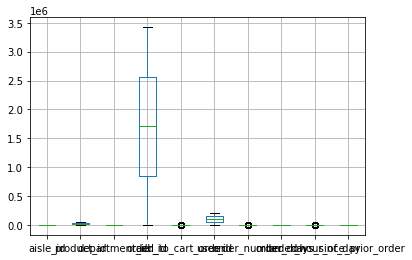

In [21]:
new.boxplot()

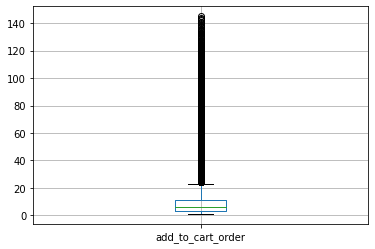

In [22]:
new.boxplot(column = 'add_to_cart_order')

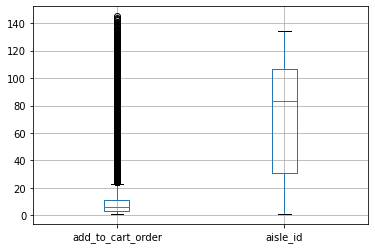

In [23]:
new.boxplot(column = ['add_to_cart_order', 'aisle_id'])

### Plot the distribution of numeric columns

In [24]:
 #pandas_profiling.ProfileReport(new)   - data profiling

In [26]:
new.duplicated(subset=None, keep=False)

0           False
1           False
2           False
3           False
4           False
            ...  
33819101    False
33819102    False
33819103    False
33819104    False
33819105    False
Length: 33819106, dtype: bool

In [27]:
new = new.drop_duplicates(keep='first')

In [28]:
new['aisle'].value_counts()

fresh fruits                  3792661
fresh vegetables              3568630
packaged vegetables fruits    1843806
yogurt                        1507583
packaged cheese               1021462
                               ...   
eye ear care                     9522
baby bath body care              8909
baby accessories                 8466
beauty                           6455
frozen juice                     5147
Name: aisle, Length: 134, dtype: int64

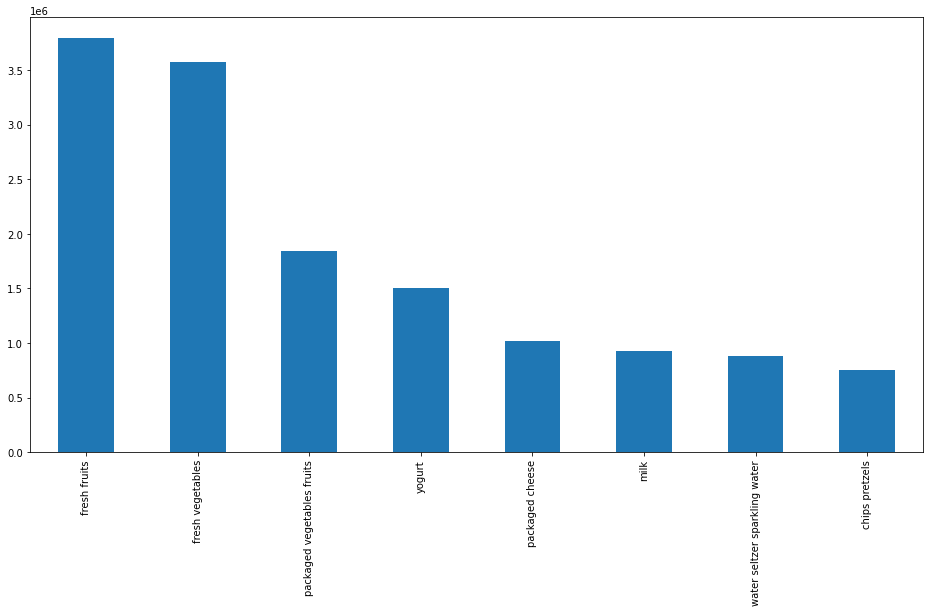

In [29]:
plt.figure(figsize=(16,8))
new['aisle'].value_counts().head(8).plot.bar()
plt.show()

<BarContainer object of 5 artists>

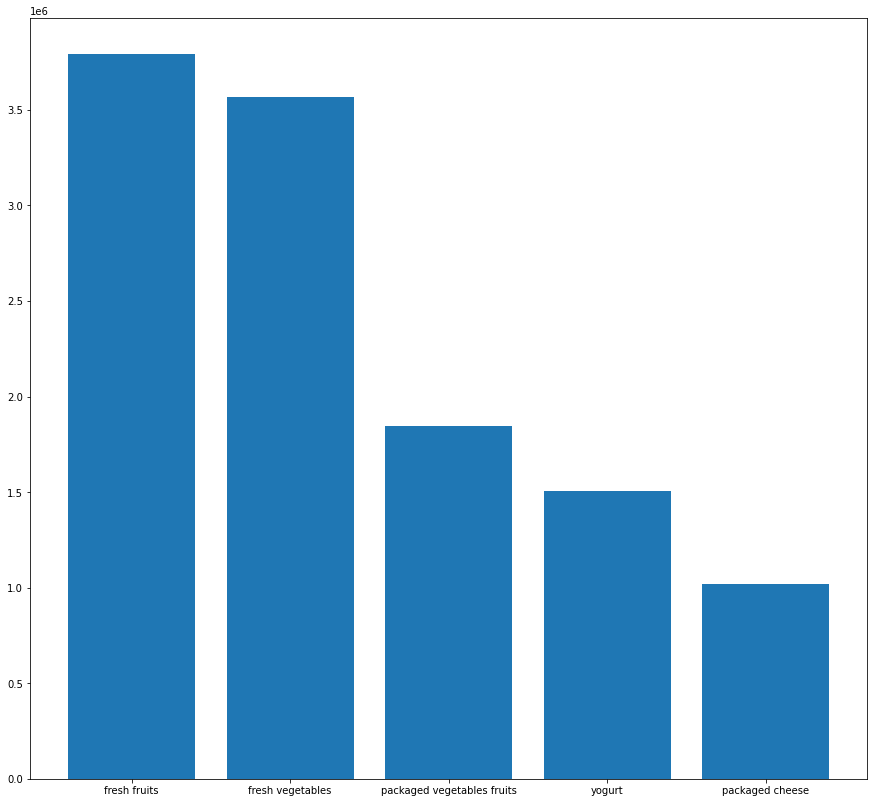

In [30]:
plt.figure(figsize=(15,14))
aisle = new['aisle'].value_counts().reset_index()
plt.bar(aisle['index'][0:5], aisle['aisle'][0:5])

In [31]:
new['product_name'].value_counts()

Banana                            491291
Bag of Organic Bananas            394930
Organic Strawberries              275577
Organic Baby Spinach              251705
Organic Hass Avocado              220877
                                   ...  
Brut Prosecco                          1
Coconut Cardamom Almond Butter         1
Pure Peppermint Extract                1
Original Jerky                         1
Hennepin Farmhouse Ale                 1
Name: product_name, Length: 49626, dtype: int64

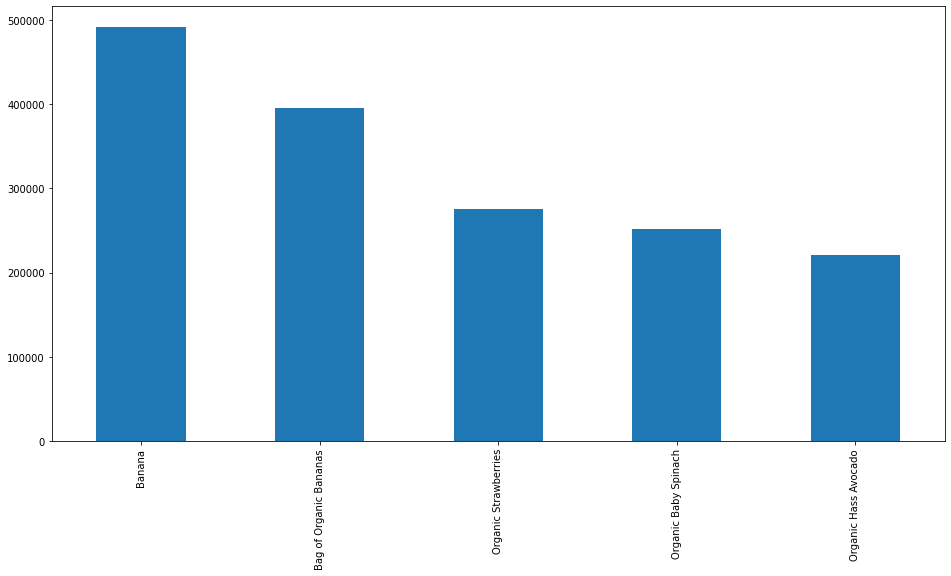

In [32]:
# bar chart
plt.figure(figsize=(16,8))
new['product_name'].value_counts().head(5).plot.bar()
plt.show()

<BarContainer object of 5 artists>

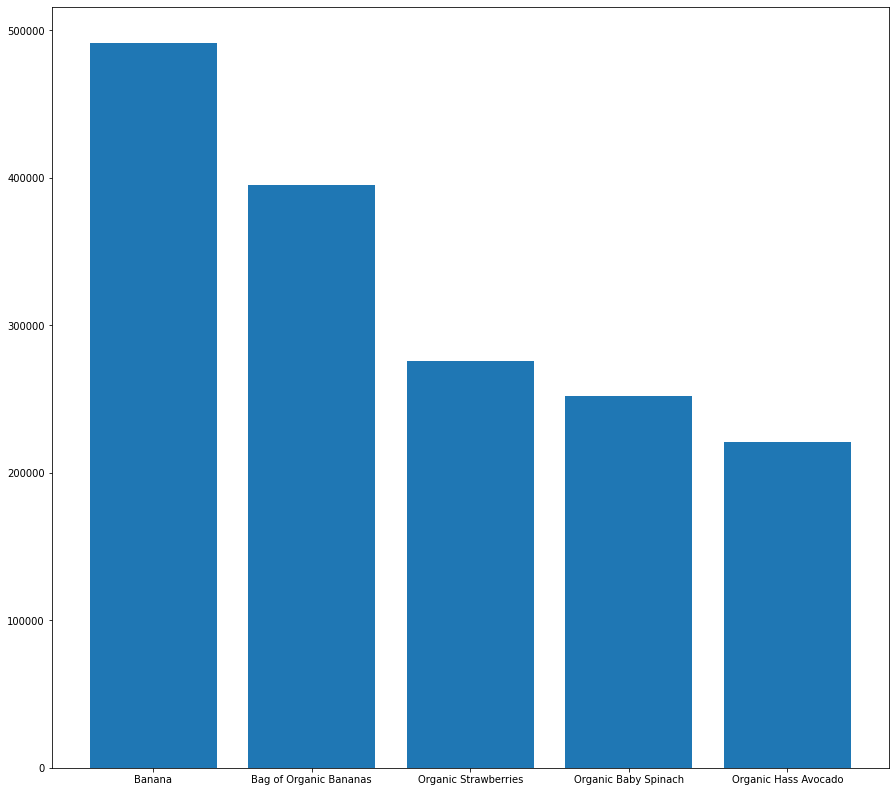

In [33]:
#another way to show the bar chart
plt.figure(figsize=(15,14))
product_name = new['product_name'].value_counts().reset_index()
plt.bar(product_name['index'][0:5], product_name['product_name'][0:5])

In [30]:
new['department'].value_counts()

produce            9888378
dairy eggs         5631067
snacks             3006412
beverages          2804175
frozen             2336858
pantry             1956819
bakery             1225181
canned goods       1114857
deli               1095540
dry goods pasta     905340
household           774652
meat seafood        739238
breakfast           739069
personal care       468693
babies              438743
international       281155
alcohol             159294
pets                102221
missing              77396
other                38086
bulk                 35932
Name: department, dtype: int64

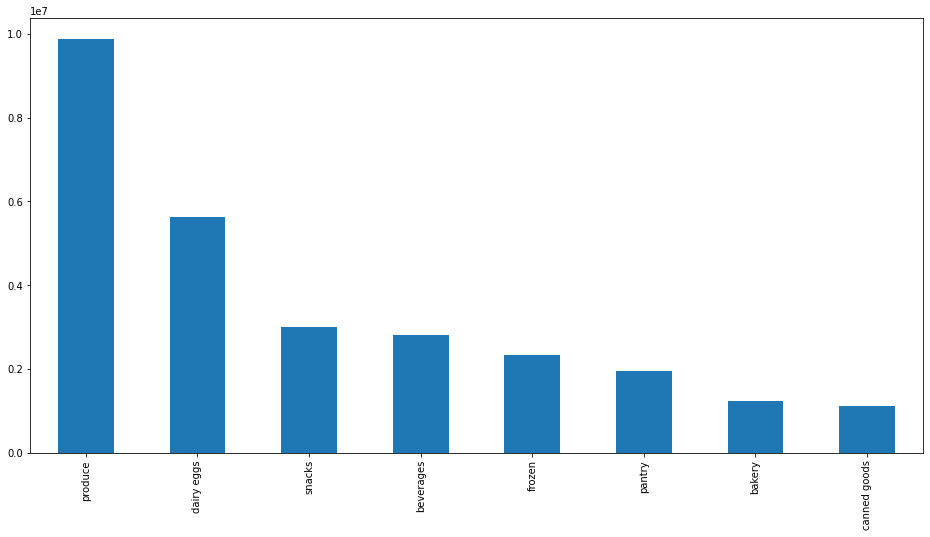

In [31]:
#distribution
plt.figure(figsize=(16,8))
new['department'].value_counts().head(8).plot.bar()
plt.show()

<BarContainer object of 5 artists>

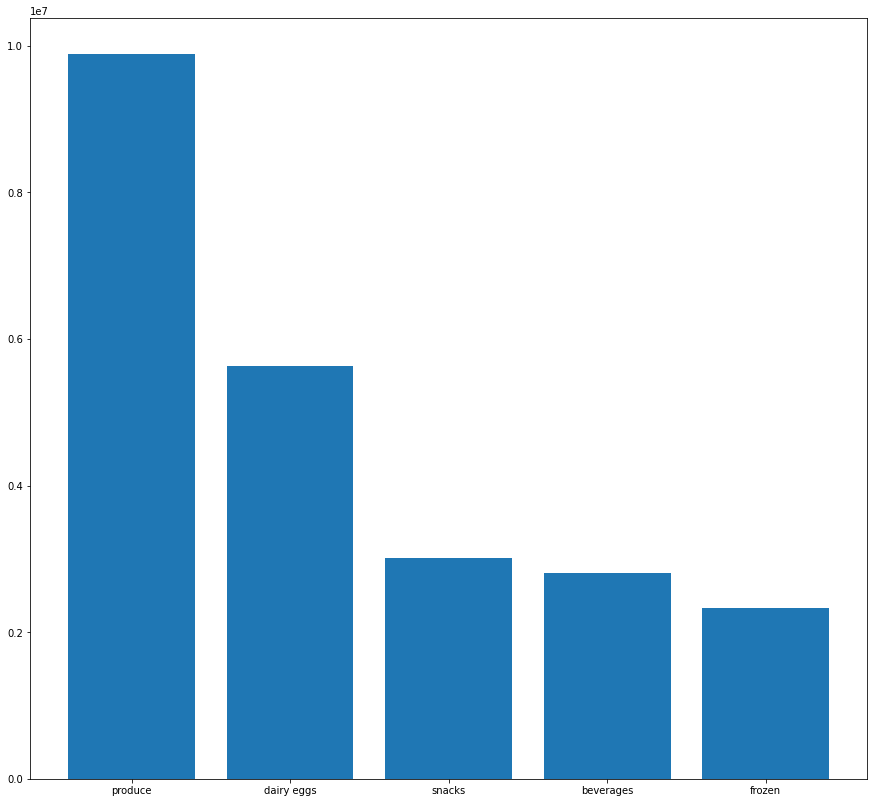

In [32]:
# bar chart
department = new['department'].value_counts().reset_index()
plt.figure(figsize=(15,14))
plt.bar(department['index'][0:5], department['department'][0:5])

In [33]:
new['order_number'].value_counts()

1      2078068
3      2050731
2      2048332
4      1970180
5      1751959
        ...   
96       14215
97       13691
98       13150
99       12686
100       7624
Name: order_number, Length: 100, dtype: int64

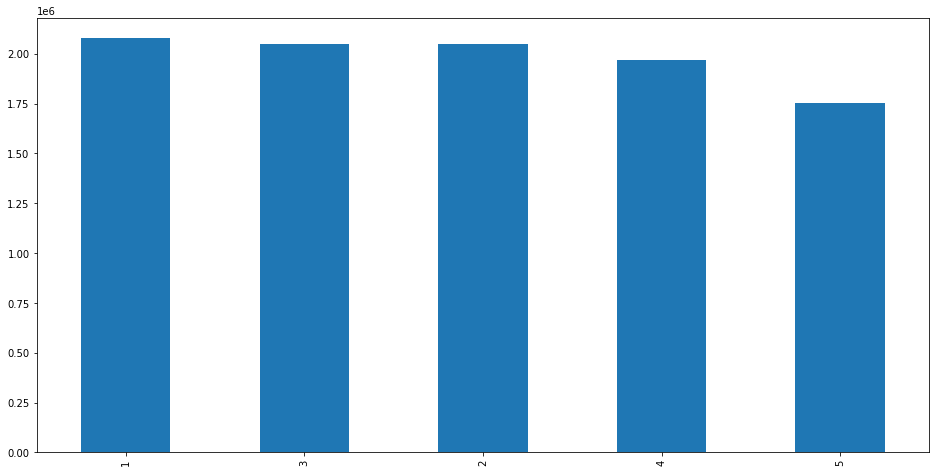

In [34]:
plt.figure(figsize=(16,8))
new['order_number'].value_counts().head(5).plot.bar()
plt.show()

<BarContainer object of 5 artists>

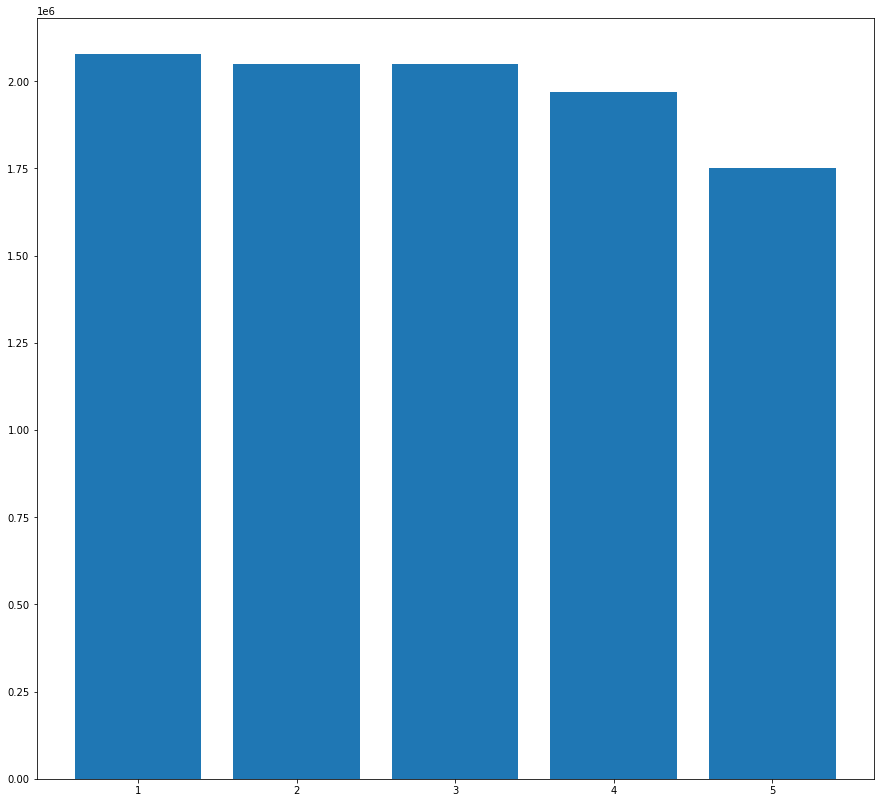

In [35]:
# another way to show bar chart
plt.figure(figsize=(15,14))
order_number = new['order_number'].value_counts().reset_index()
plt.bar(order_number['index'][0:5], order_number['order_number'][0:5])

In [36]:
new['order_dow'].value_counts()

0    6533692
1    5871834
6    4707583
5    4386443
2    4378360
3    3998498
4    3942696
Name: order_dow, dtype: int64

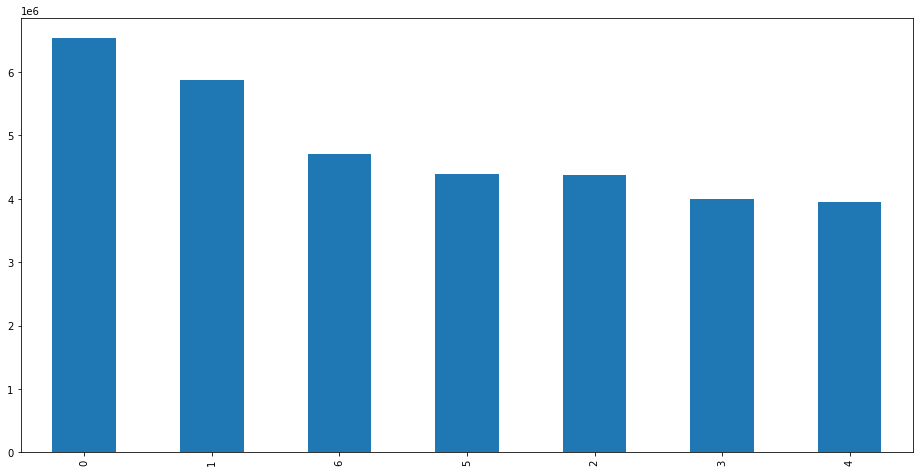

In [37]:
plt.figure(figsize=(16,8))
new['order_dow'].value_counts().plot.bar()
plt.show()

<BarContainer object of 7 artists>

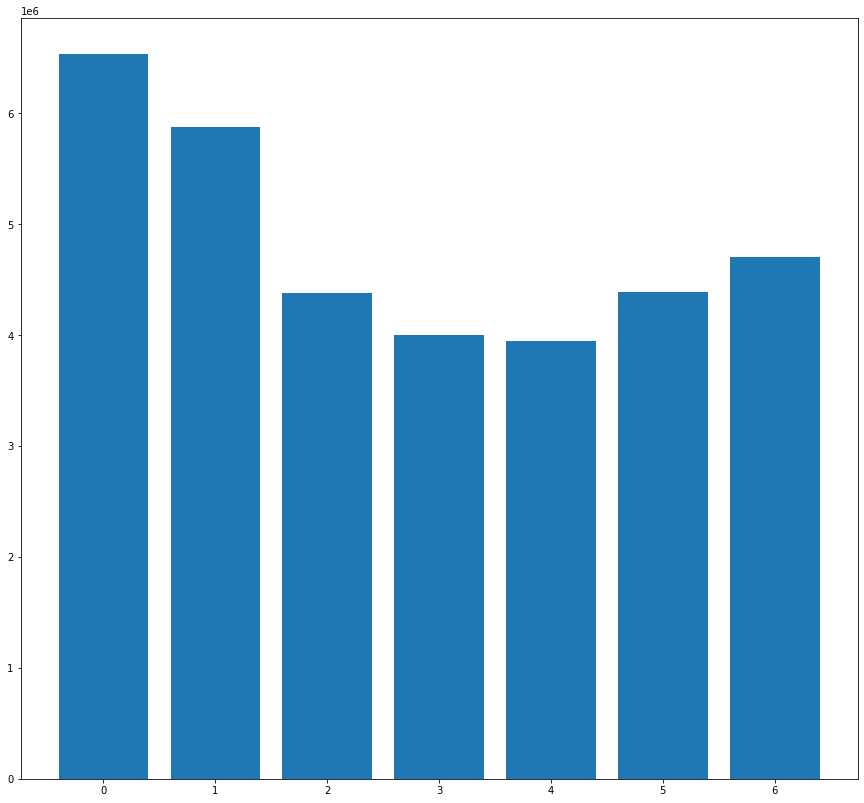

In [38]:
# another way to show bar chart
plt.figure(figsize=(15,14))
order_dow = new['order_dow'].value_counts().reset_index()
plt.bar(order_dow['index'][0:7], order_dow['order_dow'][0:7])

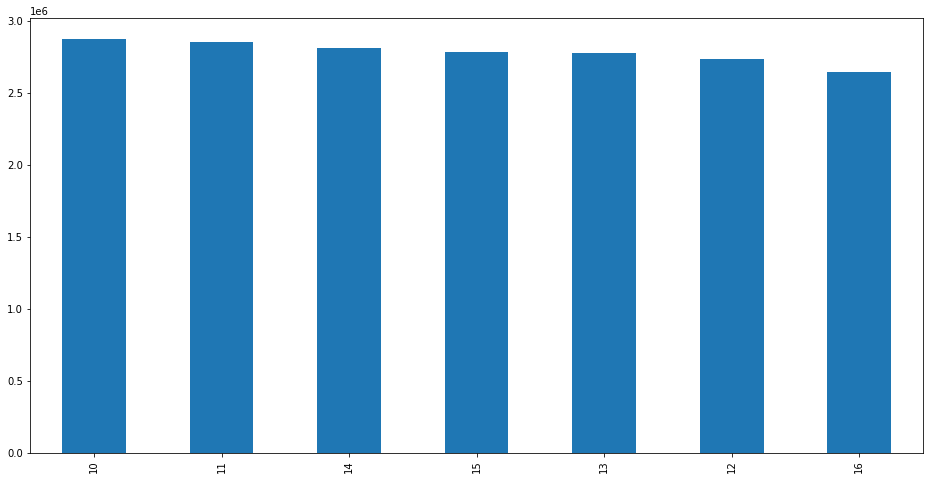

In [39]:
plt.figure(figsize=(16,8))
new['order_hour_of_day'].value_counts().head(7).plot.bar()
plt.show()

<BarContainer object of 6 artists>

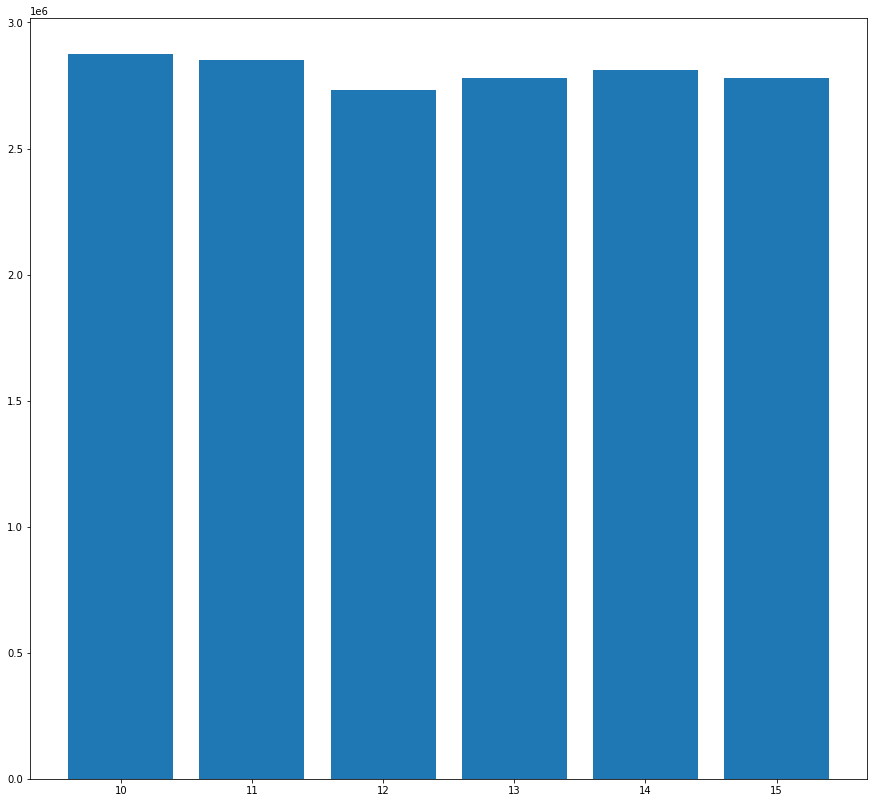

In [40]:
# another way to show bar chart
plt.figure(figsize=(15,14))
order_hour_of_day = new['order_hour_of_day'].value_counts().reset_index()
plt.bar(order_hour_of_day['index'][0:6], order_hour_of_day['order_hour_of_day'][0:6])

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


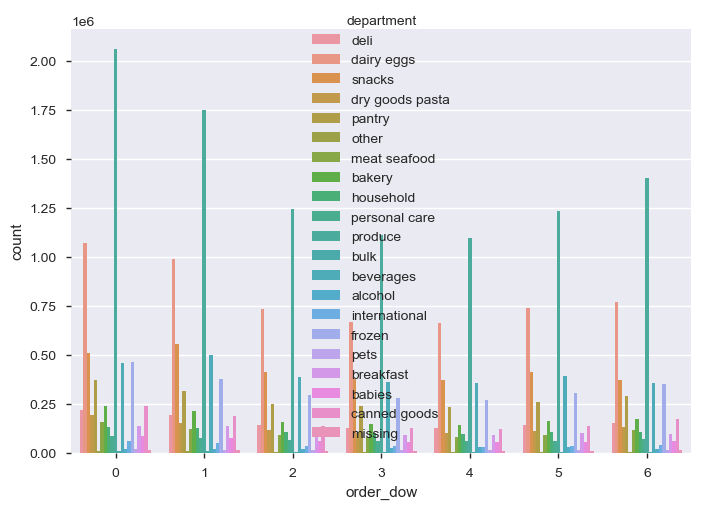

In [20]:
sns.countplot("order_dow", hue = "department", data = new)   # 把横轴调节大一些

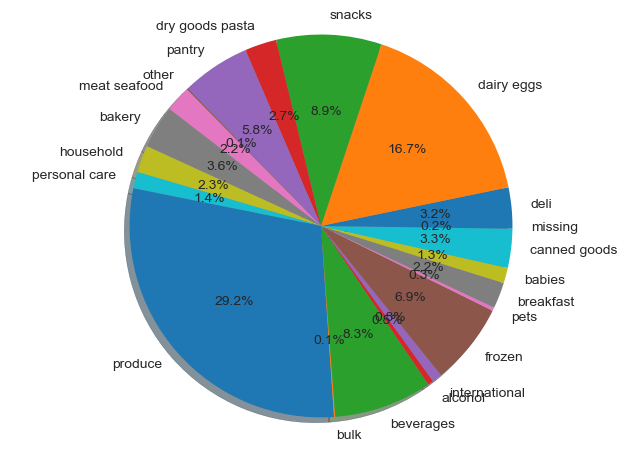

In [22]:
labels = new['department'].unique().tolist()
counts = new['department'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()

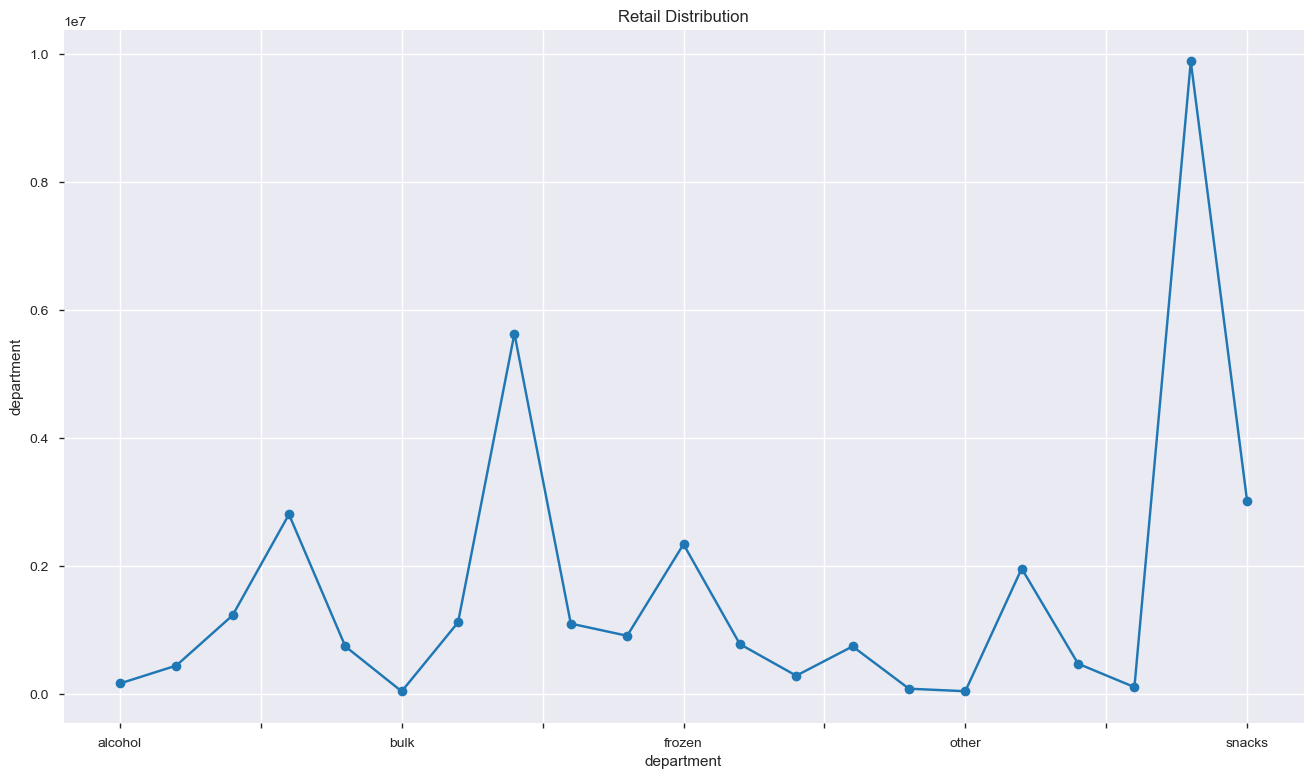

In [26]:
plt.figure(figsize=(16,9))
new.groupby('department')['order_dow'].count().plot(marker = 'o')
plt.ylabel('department')
plt.title('Retail Distribution')
plt.show()               #对不对是一个问题，需不需要这样做是一个问题。有没有商业价值。
                         # 线图一般应用于时间序列，订单序列 sequential number。来展示随着时间的发展，数据的规律。 
                         #横轴选择季节，时间date, processed 的时间序列。线性图。

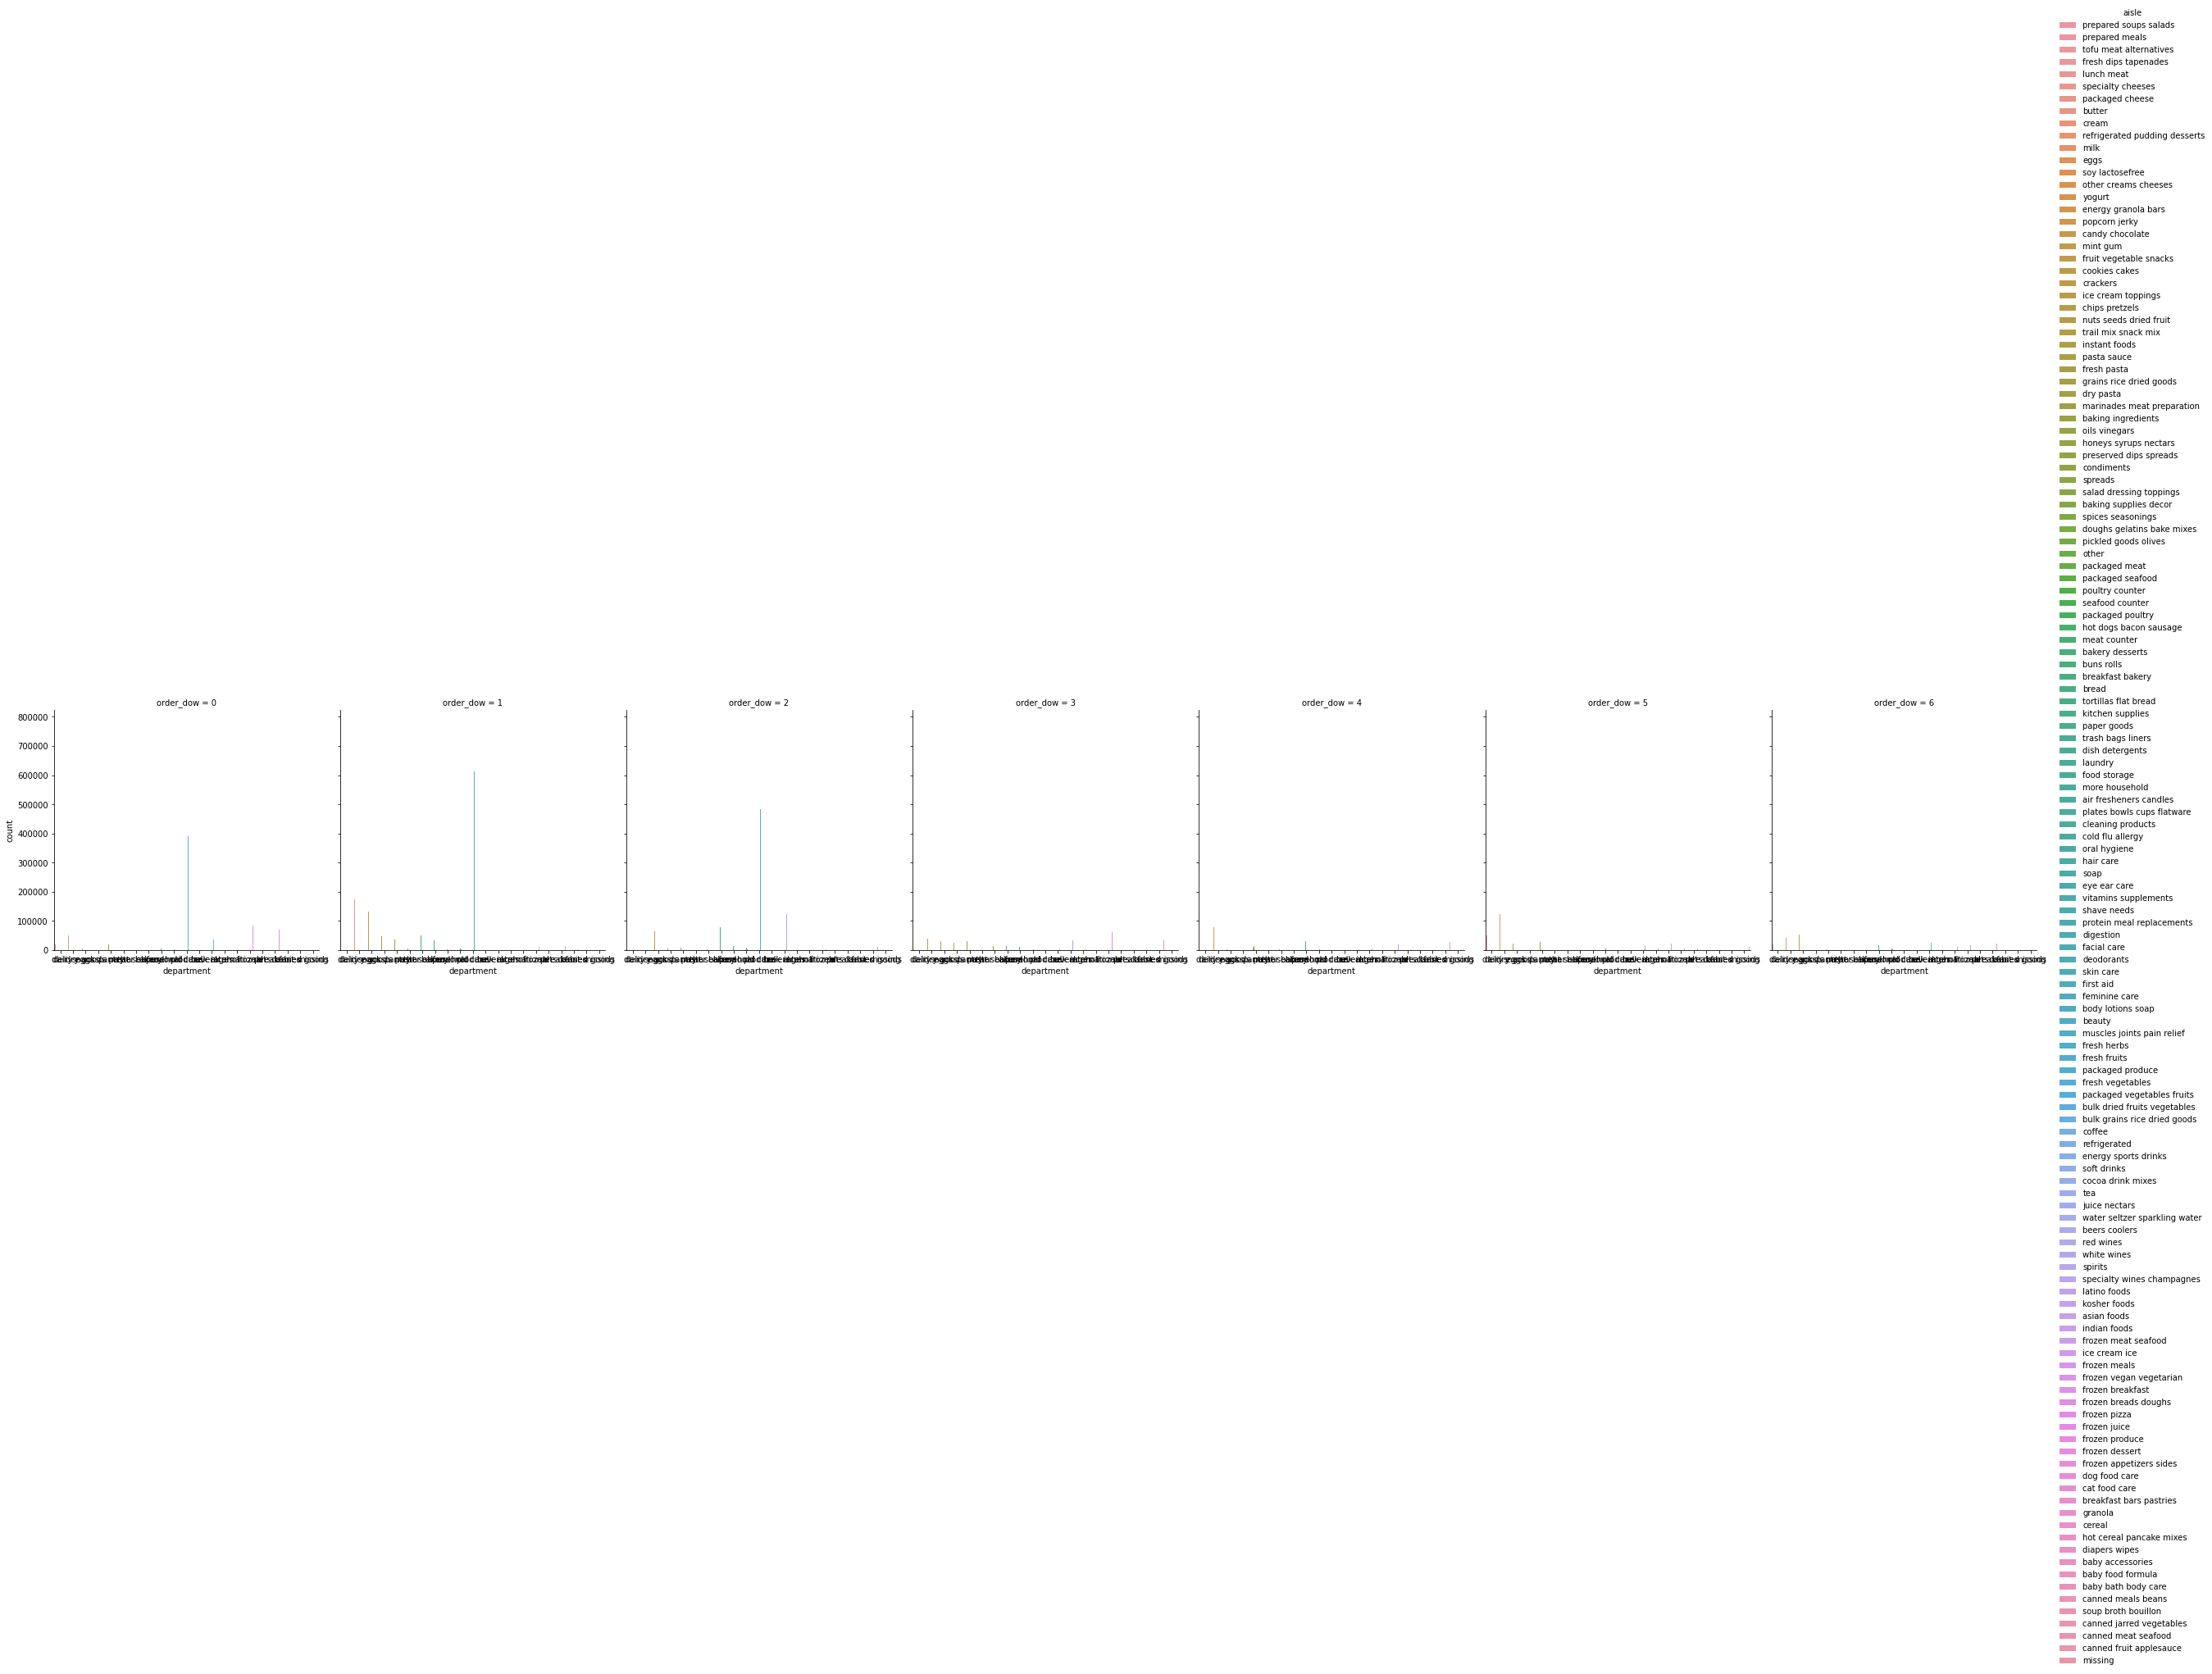

In [44]:
sns.catplot(x="department",
            hue="order_dow",
            col="aisle",
            data=new,
            kind="count"
            )        #对于aisle 画一个bar plot， top 10 就可以了
                     # 商业数据中不需要把所有的数据都显示出来，前十个，最重要的几个。top 10, bottom 10卖的最好的，最差的。
                     # 商业中业务需要看什么？数据分析师需要把对方的需求转化为技术和数据。一定要充分理解业务。技术上把图画
                     # 出来，但是应用于业务、商业中，要make sense

### Create box-plot on numeric columns

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


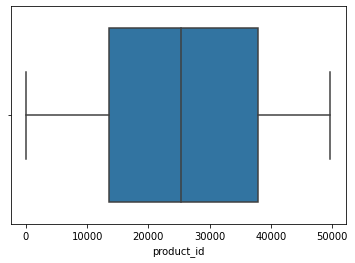

In [47]:
product_id = new['product_id']
sns.boxplot(product_id)           #没有太多商业意义

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


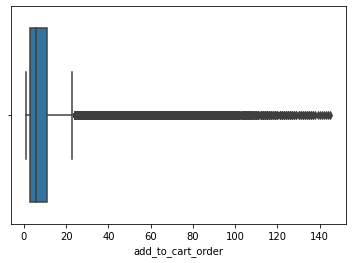

In [53]:
add_to_cart_order = new['add_to_cart_order']
sns.boxplot(add_to_cart_order)         #离散状态，异常值，outlayer

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


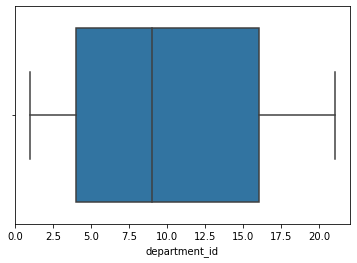

In [48]:
department_id = new['department_id']
sns.boxplot(department_id)         #没有太多商业价值

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


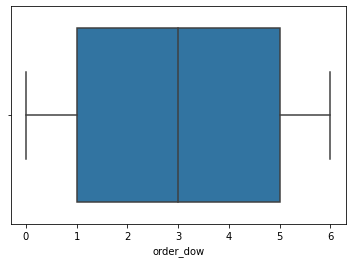

In [49]:
order_dow = new['order_dow']
sns.boxplot(order_dow)                #没有商业价值

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


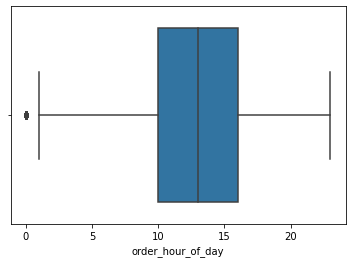

In [50]:
order_hour_of_day = new['order_hour_of_day']
sns.boxplot(order_hour_of_day)               #没有商业价值。能代表什么意义呢？

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


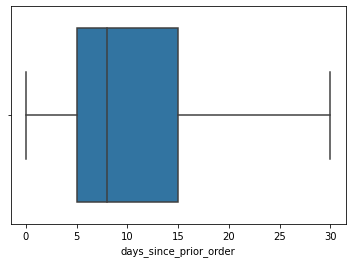

In [51]:
days_since_prior_order = new['days_since_prior_order']
sns.boxplot(days_since_prior_order)